In [1]:
#libraries
from datetime import datetime
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np



In [2]:
#variables
starting_balance = 1000 #balance
ma = 200 #ma candles


In [3]:
#datetimte
start = datetime(2015, 1, 1)
end = datetime (2025, 6, 11)
ticker = "AAPL"
interval = "1d"


In [4]:
price = yf.download(tickers=ticker, start=start, end=end, interval=interval, multi_level_index=False)
price

C:\Users\1506299\AppData\Local\Temp\ipykernel_14760\3069479411.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price = yf.download(tickers=ticker, start=start, end=end, interval=interval, multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000
...,...,...,...,...,...
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700


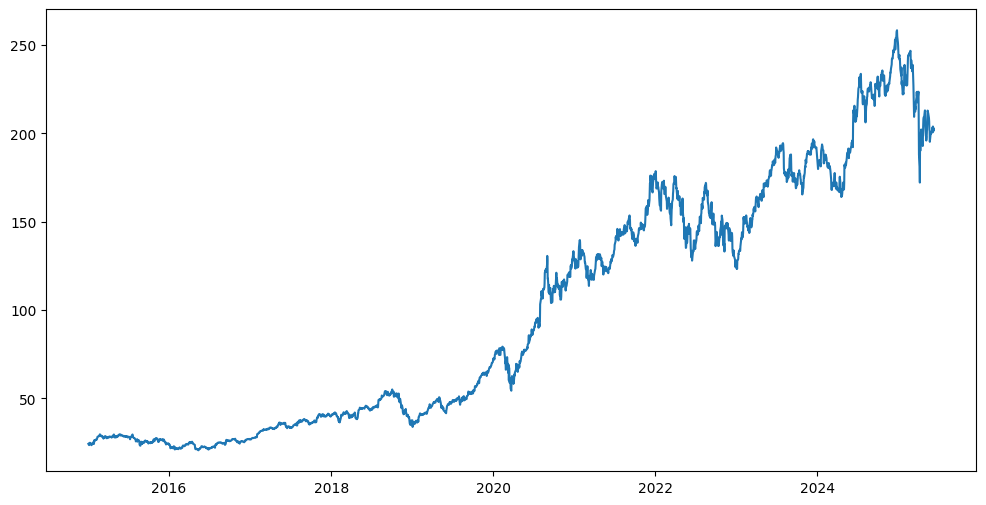

In [5]:
plt.figure(figsize=(12,6))
plt.plot(price['Close'])
plt.show()



In [6]:
#dailyreturn
price['Return'] = price.Close / price.Close.shift(1)
price.Return.iat[0] = 1
price['Bench_Bal'] = starting_balance * price.Return.cumprod()

price


,Close,High,Low,Open,Volume,Return,Bench_Bal
Date,,,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400,1.000000,1000.000000
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000,0.971828,971.828024
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400,1.000094,971.919588
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,1.014022,985.548147
2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000,1.038422,1023.414792
...,...,...,...,...,...,...,...
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,0.997786,8350.424113
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,0.989202,8260.258210
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,1.016398,8395.712496


In [7]:
first_timestamp = price.index.min() 
last_timestamp = price.index.max()
# Calculate the number of years
years = (last_timestamp - first_timestamp).days / 365.25
price['Bench_Peak'] = price. Bench_Bal.cummax()
price['Bench_DD'] = price. Bench_Bal - price.Bench_Peak
cagr_bench = round((((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[0]) ** (1/years)) -1) *100, 2) 
dd_bench = round(((price.Bench_DD / price. Bench_Peak).min()) * 100, 2)
print(f"Benchmark Annual Return: {cagr_bench}%")
print(f"Benchmark DD: {dd_bench}%")

Benchmark Annual Return: 22.54%
Benchmark DD: -38.52%


In [8]:
#Calculating Indicators
price['MA'] = price.Close.rolling(window=ma).mean()

#RSI
price['Delta'] = price['Close'].diff()
price['Gain'] = price['Delta'].clip(lower=0)
price['Loss'] = -price['Delta'].clip(upper=0)
price['Avg_Gain'] = price['Gain'].rolling(window=14).mean()
price['Avg_Loss'] = price['Loss'].rolling(window=14).mean()
price['RS'] = price['Avg_Gain'] / price['Avg_Loss']
price['RSI'] = 100 - (100 / (1 + price['RS']))

#MACD
price['EMA_short'] = price['Close'].ewm(span=12, adjust=False).mean()
price['EMA_long'] = price['Close'].ewm(span=26, adjust=False).mean()
price['MACD'] = price['EMA_short'] - price['EMA_long']
price['MACD_Signal'] = price['MACD'].ewm(span=9, adjust=False).mean()
price['MACD_Hist'] = price['MACD'] - price['MACD_Signal']



price['Long'] = price.Close > price.MA

price 

,Close,High,Low,Open,Volume,Return,Bench_Bal,Bench_Peak,Bench_DD,MA,...,Avg_Gain,Avg_Loss,RS,RSI,EMA_short,EMA_long,MACD,MACD_Signal,MACD_Hist,Long
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400,1.000000,1000.000000,1000.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,24.288588,24.288588,0.000000,0.000000,0.000000,False
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000,0.971828,971.828024,1000.000000,-28.171976,NaN,...,NaN,NaN,NaN,NaN,24.183317,24.237902,-0.054585,-0.010917,-0.043668,False
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400,1.000094,971.919588,1000.000000,-28.080412,NaN,...,NaN,NaN,NaN,NaN,24.094584,24.191135,-0.096551,-0.028044,-0.068507,False
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,1.014022,985.548147,1000.000000,-14.451853,NaN,...,NaN,NaN,NaN,NaN,24.070429,24.172353,-0.101924,-0.042820,-0.059104,False
2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000,1.038422,1023.414792,1023.414792,0.000000,NaN,...,NaN,NaN,NaN,NaN,24.191486,24.223090,-0.031604,-0.040577,0.008973,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,0.997786,8350.424113,10638.604107,-2288.179994,224.856052,...,0.605000,1.284285,0.471079,32.022693,202.456069,203.672255,-1.216186,-1.197420,-0.018766,False
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,0.989202,8260.258210,10638.604107,-2378.345897,224.732911,...,0.605000,1.377857,0.439088,30.511538,202.175136,203.446903,-1.271767,-1.212290,-0.059477,False
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,1.016398,8395.712496,10638.604107,-2242.891611,224.627017,...,0.840000,1.364285,0.615707,38.107583,202.443577,203.481948,-1.038371,-1.177506,0.139135,False


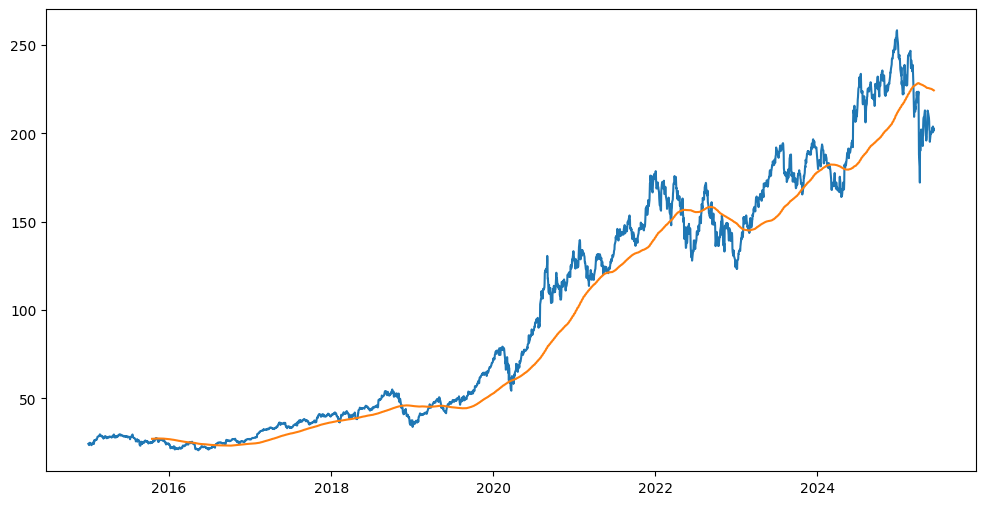

In [9]:
plt.figure(figsize=(12,6)) 
plt.plot(price.Close)
plt.plot(price.MA)


In [10]:
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price['Sys_Bal'] = starting_balance * price.Sys_Ret.cumprod()

price



,Close,High,Low,Open,Volume,Return,Bench_Bal,Bench_Peak,Bench_DD,MA,...,RS,RSI,EMA_short,EMA_long,MACD,MACD_Signal,MACD_Hist,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400,1.000000,1000.000000,1000.000000,0.000000,NaN,...,NaN,NaN,24.288588,24.288588,0.000000,0.000000,0.000000,False,1.0,1000.000000
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000,0.971828,971.828024,1000.000000,-28.171976,NaN,...,NaN,NaN,24.183317,24.237902,-0.054585,-0.010917,-0.043668,False,1.0,1000.000000
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400,1.000094,971.919588,1000.000000,-28.080412,NaN,...,NaN,NaN,24.094584,24.191135,-0.096551,-0.028044,-0.068507,False,1.0,1000.000000
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,1.014022,985.548147,1000.000000,-14.451853,NaN,...,NaN,NaN,24.070429,24.172353,-0.101924,-0.042820,-0.059104,False,1.0,1000.000000
2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000,1.038422,1023.414792,1023.414792,0.000000,NaN,...,NaN,NaN,24.191486,24.223090,-0.031604,-0.040577,0.008973,False,1.0,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,0.997786,8350.424113,10638.604107,-2288.179994,224.856052,...,0.471079,32.022693,202.456069,203.672255,-1.216186,-1.197420,-0.018766,False,1.0,4355.876882
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,0.989202,8260.258210,10638.604107,-2378.345897,224.732911,...,0.439088,30.511538,202.175136,203.446903,-1.271767,-1.212290,-0.059477,False,1.0,4355.876882
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,1.016398,8395.712496,10638.604107,-2242.891611,224.627017,...,0.615707,38.107583,202.443577,203.481948,-1.038371,-1.177506,0.139135,False,1.0,4355.876882


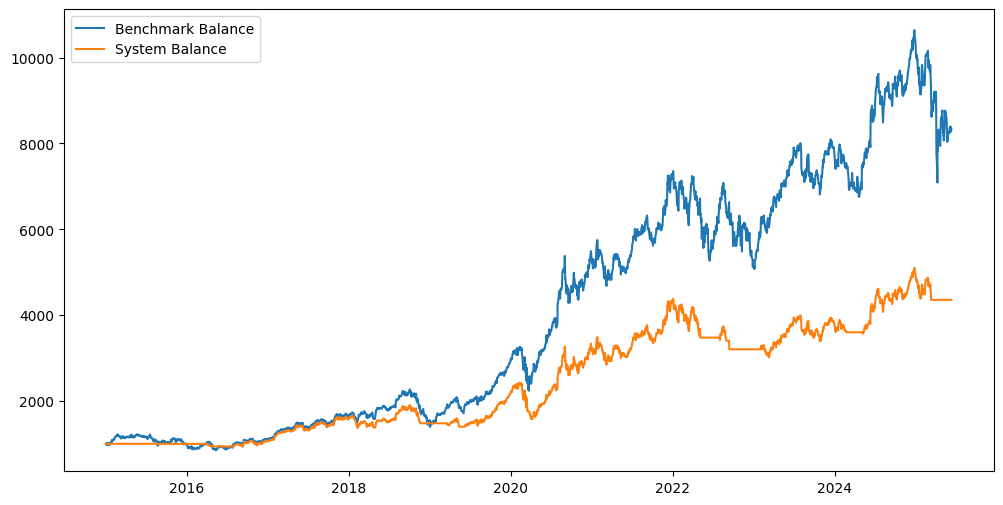

In [11]:
plt.figure(figsize=(12,6))
plt.plot(price.Bench_Bal, label = "Benchmark Balance")
plt.plot(price.Sys_Bal, label = "System Balance")

plt.legend()
plt.show()
